In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-shoes-brands/similarweb.csv
/kaggle/input/sports-shoes-brands/brands.csv
/kaggle/input/sports-shoes-brands/tiktok.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/kaggle/input/sports-shoes-brands/brands.csv")
print(df.head())
print(df.shape)
#constant feature
[col for col in df.columns if df[col].isnull().sum()>0] # if a col has altleast one Nan value then the col name will be printed

          name                            site  \
0         Nike            https://www.nike.com   
1       Adidas          https://www.adidas.com   
2     Skechers        https://www.skechers.com   
3  New Balance      https://www.newbalance.com   
4        ASICS  https://www.asics.com/us/en-us   

                                    wikipedia  wikipedia_languages_num  \
0  https://en.wikipedia.org/wiki/Nike%2C_Inc.                       75   
1        https://en.wikipedia.org/wiki/Adidas                       91   
2      https://en.wikipedia.org/wiki/Skechers                       17   
3   https://en.wikipedia.org/wiki/New_Balance                       32   
4         https://en.wikipedia.org/wiki/Asics                       35   

         twitter  twitter_following  twitter_followers  twitter_tweets  \
0          /Nike                120            9863642           38544   
1        /adidas                200            4377037           15950   
2  /SKECHERSUSAx                

['twitter_verified', 'zippia_revenue', 'zippia_local']

In [3]:
print(df.columns)

Index(['name', 'site', 'wikipedia', 'wikipedia_languages_num', 'twitter',
       'twitter_following', 'twitter_followers', 'twitter_tweets',
       'twitter_verified', 'facebook', 'facebook_likes', 'facebook_followers',
       'facebook_verified', 'instagram', 'instagram_posts',
       'instagram_followers', 'instagram_following', 'instagram_verified',
       'instagram_socialstates_engagement', 'youtube', 'youtube_subscribers',
       'youtube_videos', 'youtube_views', 'youtube_verified', 'youtube_joined',
       'tiktok', 'tiktok_following', 'tiktok_followers', 'tiktok_likes',
       'tiktok_verified', 'snapchat', 'snapchat_verified', 'pinterest',
       'pinterest_followers', 'pinterest_following', 'pinterest_verified',
       'linkedin', 'site_social_links', 'corewebvitals_mobile',
       'corewebvitals_desktop', 'pagespeedweb_performance_m',
       'pagespeedweb_accessibility_m', 'pagespeedweb_best_m',
       'pagespeedweb_ceo_m', 'pagespeedweb_performance_d',
       'pagespeedweb

What’s happening: x_train and x_test contain all features except the instagram column (i.e., the entire dataset minus instagram).

y_train and y_test contain only the instagram column (your target variable).

So: You are using the entire dataset’s features (all columns except instagram) to predict or analyze the instagram column.

The focus is on modeling or working with the instagram data as the target, but the input features come from the rest of the dataset.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['instagram'], axis=1),  # Note the capital "T"
    df['instagram'],
    test_size=0.3,
    random_state=0
)


You’re finding numeric columns in training data that have zero variance.

This tells you which columns provide no information during training.

Then you can remove these columns from both x_train and x_test before model training.

In [5]:
#In this method we remove the feature columns which have same value in all the data i.e.,
#where variance is zero.  (A constant feature has the same value for all rows in the dataset.)
constant_features = [
    feature for feature in x_train.select_dtypes(include=['number']).columns
    if x_train[feature].std() == 0
]
print(len(constant_features)) #There are no numeric columns in your x_train whose values are all the same.

0


In [6]:
# 20 cols have numerical values
numeric_cols = x_train.select_dtypes(include=['number']).columns
print(numeric_cols)
print(f"Number of numeric columns: {len(numeric_cols)}")

Index(['wikipedia_languages_num', 'twitter_following', 'twitter_followers',
       'twitter_tweets', 'instagram_posts', 'instagram_following',
       'instagram_socialstates_engagement', 'youtube_videos', 'youtube_views',
       'pagespeedweb_performance_m', 'pagespeedweb_accessibility_m',
       'pagespeedweb_best_m', 'pagespeedweb_ceo_m',
       'pagespeedweb_performance_d', 'pagespeedweb_accessibility_d',
       'pagespeedweb_best_d', 'pagespeedweb_d_ceo', 'indeed_stars',
       'mozcom_domain_authority', 'mozcom_spam_score'],
      dtype='object')
Number of numeric columns: 20


In [7]:
#anyhow in my dataset there is no constant feature. so my dataset is ready for training. if it has any constant feature
#you can drop it using this drop methods below
x_train.drop(labels= constant_features, axis=1, inplace=True)
x_test.drop(labels=constant_features, axis=1, inplace=True)

Quasi-Constant Feature: A quasi-constant feature has almost the same value for all rows, but a few values are different.

Feature B
0 0 0 1 → 3 out of 4 values are 0, only one is different (1), so Feature B is quasi-constant.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['instagram'], axis=1),  # Note the capital "T"
    df['instagram'],
    test_size=0.3,
    random_state=0
)

In [9]:
# Create an empty list to store the names of features (columns) that are quasi-constant.
quasi_constant_feat = []

# Loop for searching all the columns in the data
# Iterates through each feature/column in the training dataset x_train
for feature in x_train.columns:
    # find the predominant value
    # x_train[feature].value_counts() - counts how many times each unique value appears.
    # Dividing by len(x_train) - gives the proportion (frequency) of each value.
    # .sort_values(ascending=False).values[0] - picks the most frequent value's proportion.
    predominant = (x_train[feature].value_counts() / len(x_train)).sort_values(ascending=False).values[0]

    # evaluate predominant feature
    # If the most common value in that column appears in more than 99.9% of the rows,
    # the feature is considered quasi-constant, and it is added to the list.
    if predominant > 0.999:
        quasi_constant_feat.append(feature)

# This line would typically be used to display the list of quasi-constant features
# after the loop has completed.
len(quasi_constant_feat)

2

In [10]:
x_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)
print(x_train.shape, x_test.shape)

(7, 60) (3, 60)


In [11]:
# Create an empty list for duplicated features
duplicated_feat = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]

    for col_2 in x_train.columns[i + 1:]:
        # if the features are duplicated
        if x_train[col_1].equals(x_train[col_2]):
            # and then append the duplicated one to the list
            duplicated_feat.append(col_2)

In [12]:
duplicated_features = set(duplicated_feat)

# Print the number of unique duplicated features
print(len(duplicated_features))

2


In [13]:
duplicated_features = [col for col in duplicated_features if col in x_train.columns]

x_train.drop(columns=duplicated_features, inplace=True)
x_test.drop(columns=duplicated_features, inplace=True)

print(x_train.shape, x_test.shape)


(7, 58) (3, 58)


****correlation****

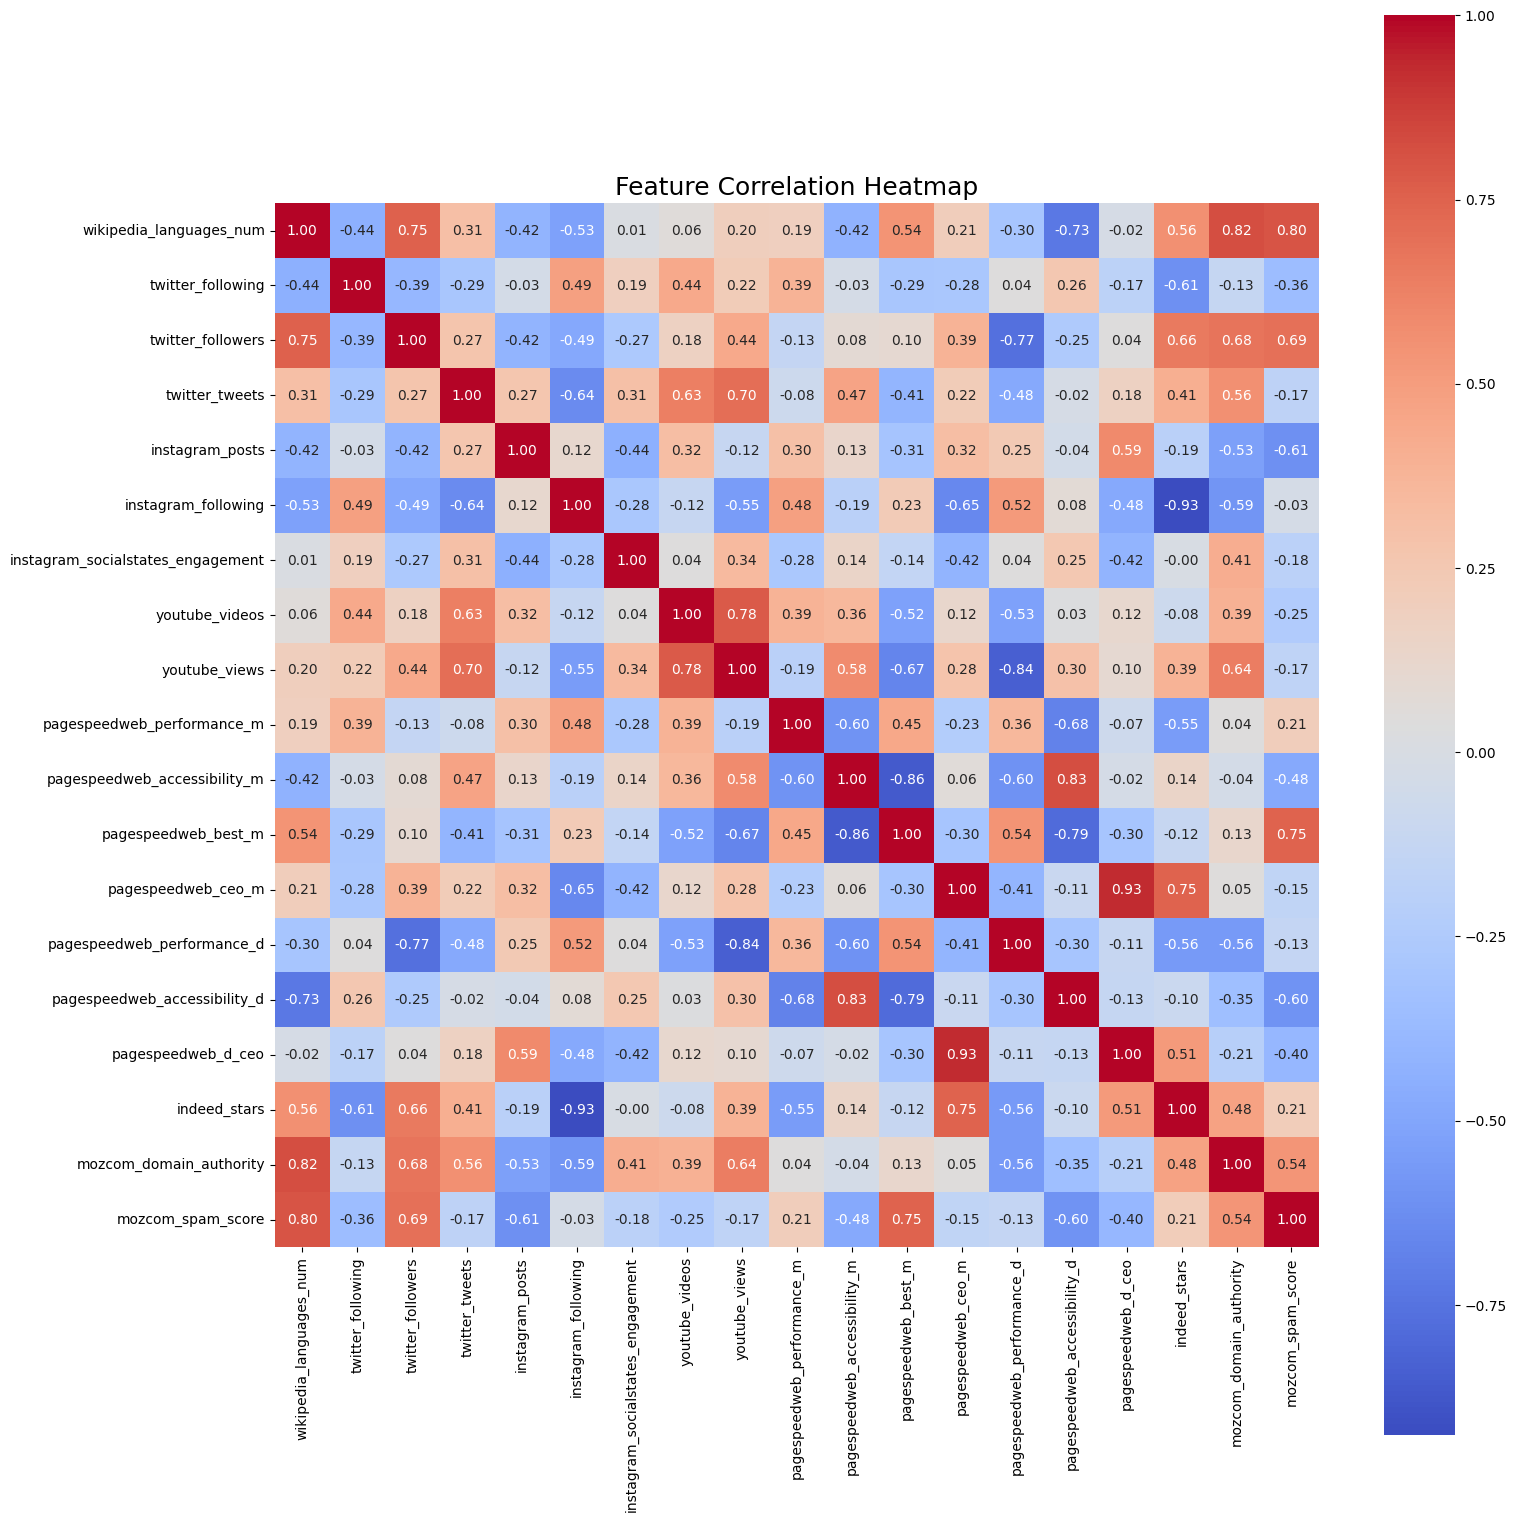

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_x_train = x_train.select_dtypes(include=["number"])

# Compute correlation matrix
corrmat = numeric_x_train.corr()

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()


In [15]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to hold the correlated column names
    numeric_dataset = dataset.select_dtypes(include=['number'])  # Select only numeric columns
    corr_matrix = numeric_dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                print(f"{colname1} and {colname2} are correlated: {corr_matrix.iloc[i, j]:.2f}")
                col_corr.add(colname1)  # You can choose colname2 instead if you prefer
    return col_corr

# Call the function with numeric-filtered data
corr_features = correlation(x_train, 0.9)
print(f"\nNumber of highly correlated features: {len(corr_features)}")
print("Correlated features to drop:", corr_features)

# Optional: drop from both train and test
x_train.drop(columns=corr_features, inplace=True)
x_test.drop(columns=corr_features, inplace=True)
x_train.shape, x_test.shape

pagespeedweb_d_ceo and pagespeedweb_ceo_m are correlated: 0.93
indeed_stars and instagram_following are correlated: -0.93

Number of highly correlated features: 2
Correlated features to drop: {'pagespeedweb_d_ceo', 'indeed_stars'}


((7, 56), (3, 56))

In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

cat_cols = x_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", cat_cols.tolist())

# 5. One-hot encode categorical columns in train and test
x_train_encoded = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=cat_cols, drop_first=True)

# 6. Align columns of test set to train set (add missing columns with 0)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# 7. Fill missing values if any
x_train_filled = x_train_encoded.fillna(0)
x_test_filled = x_test_encoded.fillna(0)

# 8. Select top 10 features based on mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train_filled, y_train)

selected_features = x_train_encoded.columns[selector.get_support()]

print("Top 10 features selected by mutual information:")
print(selected_features)

# Optional: transform train and test sets to selected features only
x_train_selected = selector.transform(x_train_filled)
x_test_selected = selector.transform(x_test_filled)

Categorical columns: ['name', 'site', 'wikipedia', 'twitter', 'twitter_verified', 'facebook', 'facebook_likes', 'facebook_followers', 'instagram_followers', 'youtube', 'youtube_subscribers', 'youtube_verified', 'youtube_joined', 'tiktok', 'tiktok_following', 'tiktok_followers', 'tiktok_likes', 'tiktok_verified', 'snapchat', 'pinterest', 'pinterest_followers', 'pinterest_following', 'pinterest_verified', 'linkedin', 'site_social_links', 'corewebvitals_mobile', 'corewebvitals_desktop', 'pagespeedweb_speed_index_m', 'pagespeedweb_speed_index_d', 'wikipedia revenue', 'market_cap', 'zippia_revenue', 'zippia_local', 'indeed', 'indeed_wellbeing', 'indeed_reviews', 'indeed_revenue', 'mozcom_linking_root_domains', 'mozcom_ranking_keywords']


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.